In [1]:
# importing the libraries:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# collecting data:
df=pd.read_csv('C:\\Users\\HP\\Downloads\\Dataset.csv',sep=';')

In [3]:
df.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
df.shape

(45211, 17)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [6]:
# checking for null values:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

--> No null values.

In [7]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [9]:
# differentiate categorical and numerical variable:
num_var=['age','balance','day','duration','campaign','pdays','previous']
cat_var= [col for col in df.columns.to_list() if col not in num_var]
cat_var.remove('y')
print(f'numerical variables are : {num_var}')
print(f'categorical variables are : {cat_var}')

numerical variables are : ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
categorical variables are : ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']


### EDA:

c:\Users\HP\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='y', ylabel='count'>

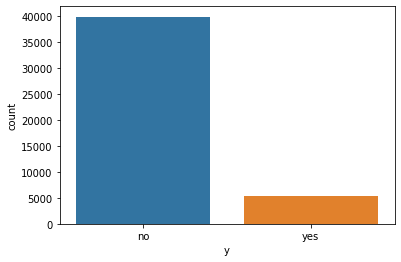

In [10]:
sns.countplot('y',data=df)

Observation: Dataset is highly imbalanced.

In [11]:
df['y'].value_counts()

no     39922
yes     5289
Name: y, dtype: int64

In [12]:
corr=df.corr(method='pearson')

<AxesSubplot:>

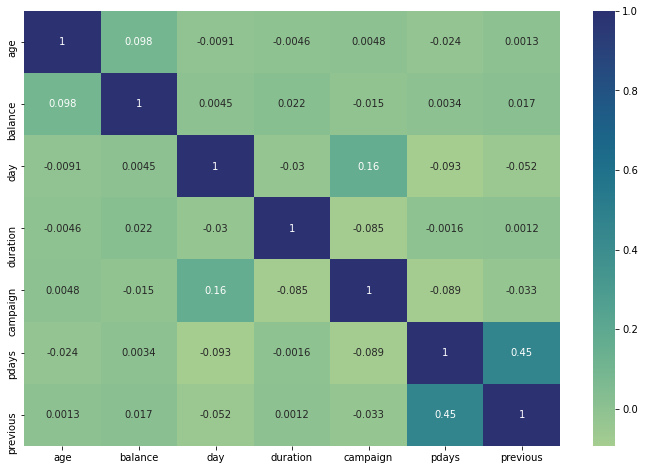

In [13]:
plt.figure(figsize=(12,8))
sns.heatmap(corr,cmap='crest',robust=True,annot=True,yticklabels=True)

Observation: No major correlation between the columns. pdays and previous are most correlated than others. 

c:\Users\HP\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\HP\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\HP\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot`

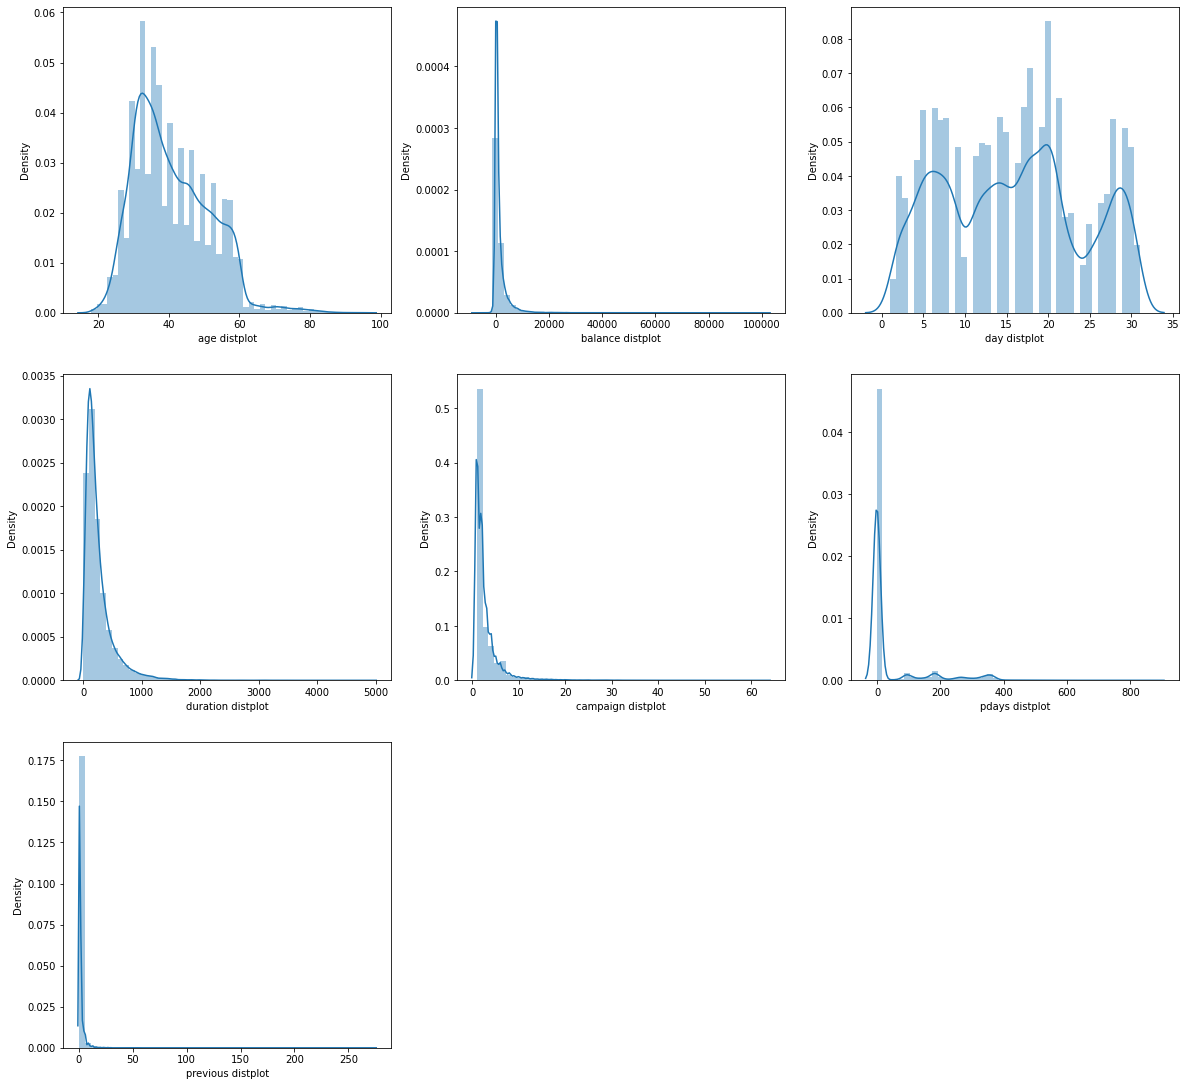

In [14]:
# visualization of numerical variable:
plt.figure(figsize=(20,80))
plotnumber=1
for col in num_var:
    ax=plt.subplot(12,3,plotnumber)
    sns.distplot(x=df[col],kde=True)
    plt.xlabel(f'{col} distplot')
    plotnumber+=1


Observation: Only day is normally distributed rest are left skewed.

c:\Users\HP\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\HP\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\HP\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in a

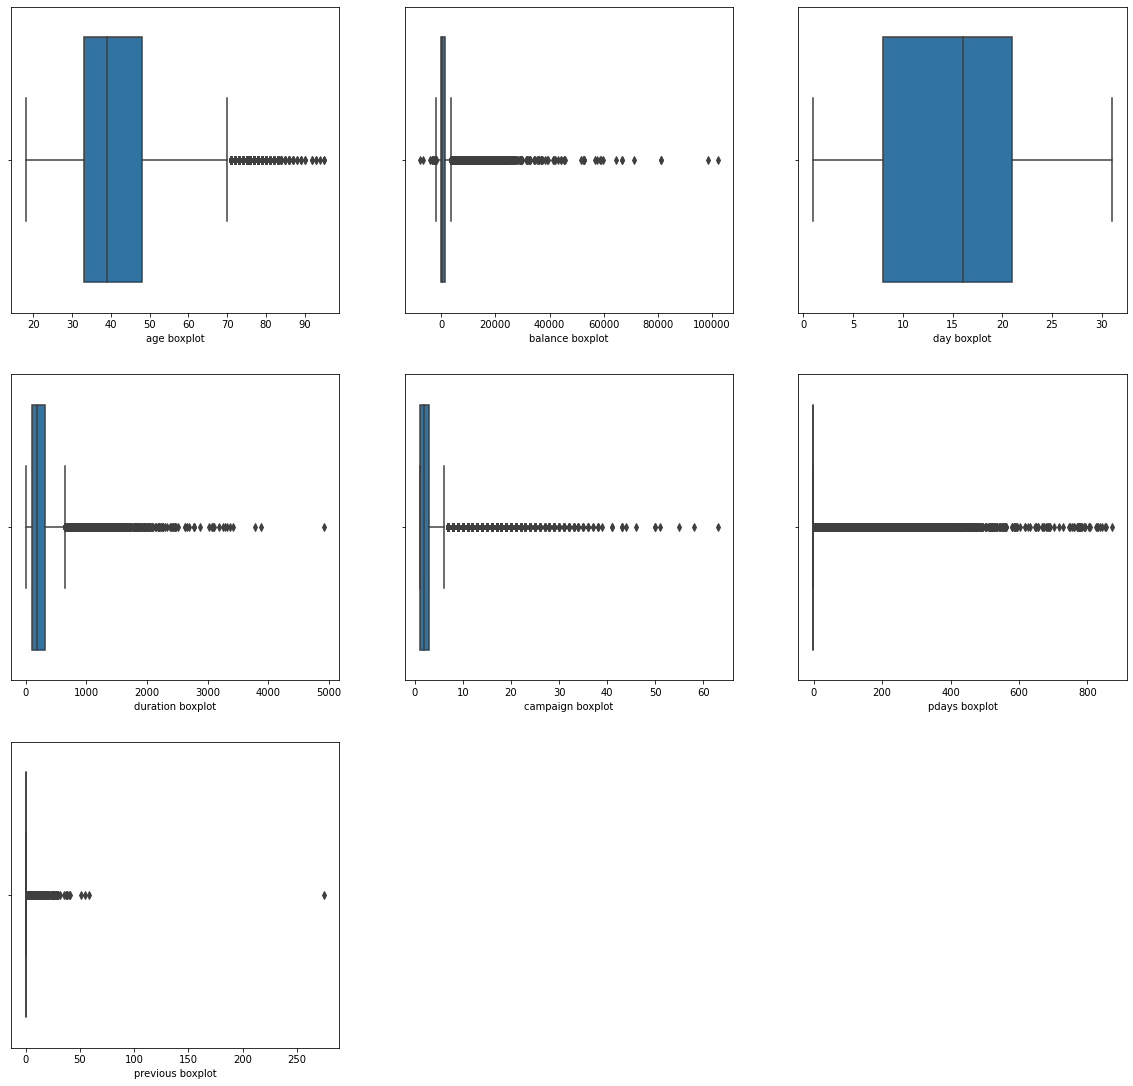

In [15]:
plt.figure(figsize=(20,80))
plotnumber=1
for num in num_var:
    plt.subplot(12,3,plotnumber)
    sns.boxplot(df[num])
    plt.xlabel(f'{num} boxplot')
    plotnumber+=1

Observation:
Except day column rest of the features have high amount of outliers.

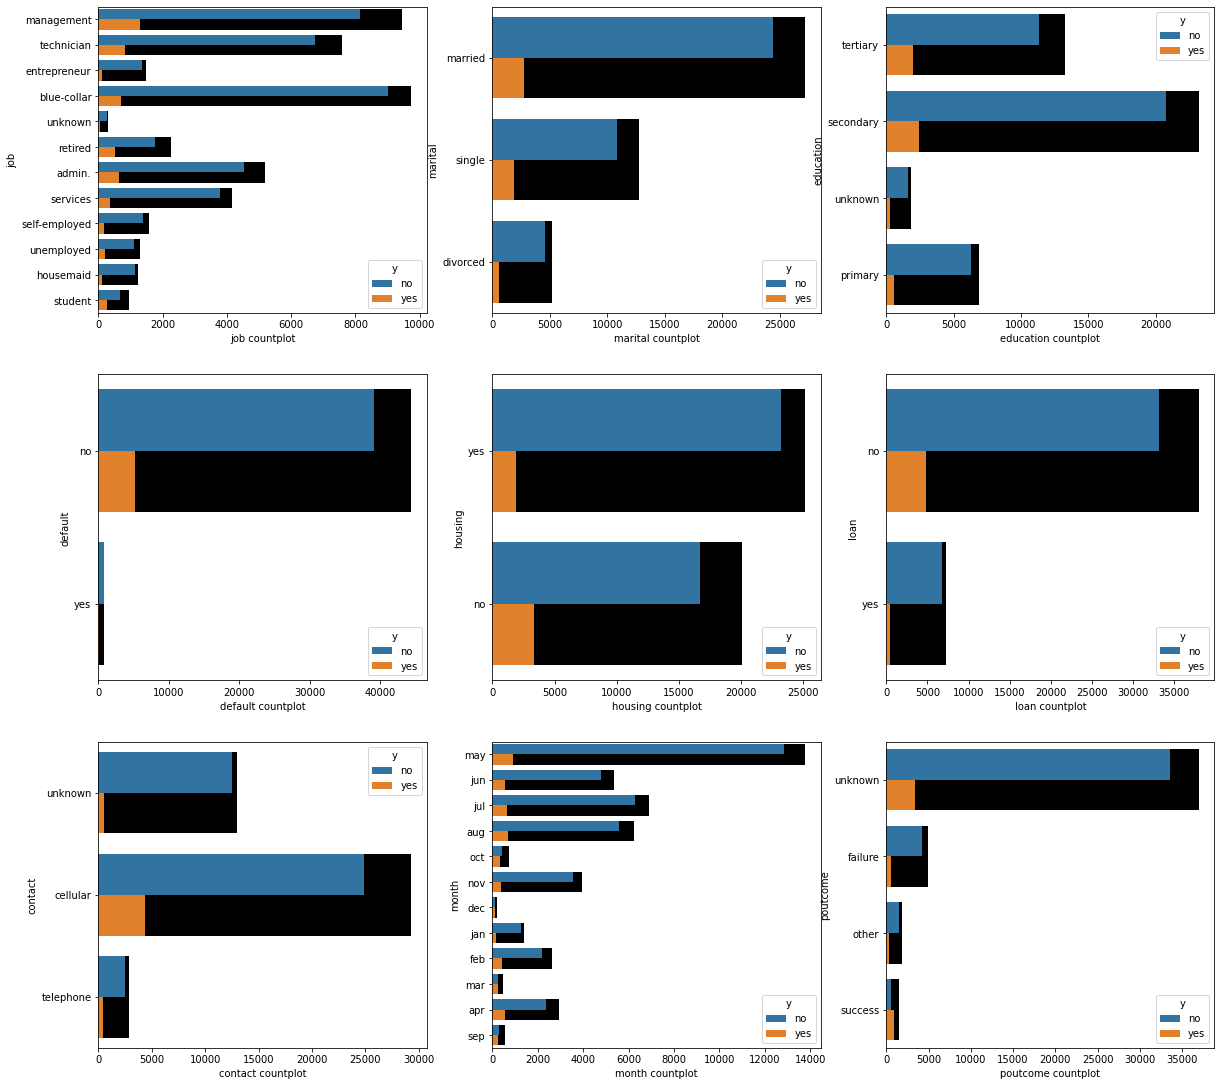

In [16]:
# visualization of categorical variable:
plt.figure(figsize=(20,80))
plotnumber=1
for col in cat_var:
    plt.subplot(12,3,plotnumber)
    sns.countplot(y=df[col],color='black')
    sns.countplot(y=df[col],hue=df['y'])
    plt.xlabel(f'{col} countplot')
    plotnumber+=1

In [17]:
for col in df['job'].unique():
    print(f'{col.upper()} :')
    contact=len(df[df['job']==col])
    print(f'No of people contacted from {col} is : {contact}')
    print(df[df['job']==col].y.value_counts())
    success_rate=df[df['job']==col].y.value_counts()[1]/len(df[df['job']==col])
    print(f'Success percent in {col} is :{success_rate*100} %')
    

MANAGEMENT :
No of people contacted from management is : 9458
no     8157
yes    1301
Name: y, dtype: int64
Success percent in management is :13.755550856417848 %
TECHNICIAN :
No of people contacted from technician is : 7597
no     6757
yes     840
Name: y, dtype: int64
Success percent in technician is :11.056996182703699 %
ENTREPRENEUR :
No of people contacted from entrepreneur is : 1487
no     1364
yes     123
Name: y, dtype: int64
Success percent in entrepreneur is :8.271687962340282 %
BLUE-COLLAR :
No of people contacted from blue-collar is : 9732
no     9024
yes     708
Name: y, dtype: int64
Success percent in blue-collar is :7.274969173859433 %
UNKNOWN :
No of people contacted from unknown is : 288
no     254
yes     34
Name: y, dtype: int64
Success percent in unknown is :11.805555555555555 %
RETIRED :
No of people contacted from retired is : 2264
no     1748
yes     516
Name: y, dtype: int64
Success percent in retired is :22.791519434628977 %
ADMIN. :
No of people contacted from

In [18]:
for col in df['marital'].unique():
    print(f'{col.upper()} :')
    contact=len(df[df['marital']==col])
    print(f'No of people contacted from {col} is : {contact}')
    print(df[df['marital']==col].y.value_counts())
    success_rate=df[df['marital']==col].y.value_counts()[1]/len(df[df['marital']==col])
    print(f'Success percent in {col} is :{success_rate*100} %')

MARRIED :
No of people contacted from married is : 27214
no     24459
yes     2755
Name: y, dtype: int64
Success percent in married is :10.123465863158668 %
SINGLE :
No of people contacted from single is : 12790
no     10878
yes     1912
Name: y, dtype: int64
Success percent in single is :14.94917904612979 %
DIVORCED :
No of people contacted from divorced is : 5207
no     4585
yes     622
Name: y, dtype: int64
Success percent in divorced is :11.945458037257538 %


In [19]:
for col in df['education'].unique():
    print(f'{col.upper()} :')
    contact=len(df[df['education']==col])
    print(f'No of people contacted from {col} is : {contact}')
    print(df[df['education']==col].y.value_counts())
    success_rate=df[df['education']==col].y.value_counts()[1]/len(df[df['education']==col])
    print(f'Success percent in {col} is :{success_rate*100} %')

TERTIARY :
No of people contacted from tertiary is : 13301
no     11305
yes     1996
Name: y, dtype: int64
Success percent in tertiary is :15.006390496955117 %
SECONDARY :
No of people contacted from secondary is : 23202
no     20752
yes     2450
Name: y, dtype: int64
Success percent in secondary is :10.559434531505904 %
UNKNOWN :
No of people contacted from unknown is : 1857
no     1605
yes     252
Name: y, dtype: int64
Success percent in unknown is :13.5702746365105 %
PRIMARY :
No of people contacted from primary is : 6851
no     6260
yes     591
Name: y, dtype: int64
Success percent in primary is :8.626477886439936 %


In [20]:
for col in df['housing'].unique():
    print(f'{col.upper()} :')
    contact=len(df[df['housing']==col])
    print(f'No. of clients contacted with housing loan: {col} is : {contact}')
    print(df[df['housing']==col].y.value_counts())
    success_rate=df[df['housing']==col].y.value_counts()[1]/len(df[df['housing']==col])
    print(f'Succes percent where housing loan is : {col}  : {success_rate*100} %')

YES :
No. of clients contacted with housing loan: yes is : 25130
no     23195
yes     1935
Name: y, dtype: int64
Succes percent where housing loan is : yes  : 7.699960206923995 %
NO :
No. of clients contacted with housing loan: no is : 20081
no     16727
yes     3354
Name: y, dtype: int64
Succes percent where housing loan is : no  : 16.70235546038544 %


In [21]:
for col in df['contact'].unique():
    print(f'{col.upper()} :')
    contact=len(df[df['contact']==col])
    print(f'No. of clients contacted by {col} medium is : {contact}')
    print(df[df['contact']==col].y.value_counts())
    success_rate=df[df['contact']==col].y.value_counts()[1]/len(df[df['contact']==col])
    print(f'Succes percent in {col} medium is : {success_rate*100} %')

UNKNOWN :
No. of clients contacted by unknown medium is : 13020
no     12490
yes      530
Name: y, dtype: int64
Succes percent in unknown medium is : 4.070660522273426 %
CELLULAR :
No. of clients contacted by cellular medium is : 29285
no     24916
yes     4369
Name: y, dtype: int64
Succes percent in cellular medium is : 14.918900460986853 %
TELEPHONE :
No. of clients contacted by telephone medium is : 2906
no     2516
yes     390
Name: y, dtype: int64
Succes percent in telephone medium is : 13.420509291121817 %


In [22]:
for col in df['month'].unique():
    print(f'{col.upper()} :')
    contact=len(df[df['month']==col])
    print(f'No. of clients contacted in {col} month is : {contact}')
    print(df[df['month']==col].y.value_counts())
    success_rate=df[df['month']==col].y.value_counts()[1]/len(df[df['month']==col])
    print(f'Succes percent in {col} month is : {success_rate*100} %')

MAY :
No. of clients contacted in may month is : 13766
no     12841
yes      925
Name: y, dtype: int64
Succes percent in may month is : 6.719453726572715 %
JUN :
No. of clients contacted in jun month is : 5341
no     4795
yes     546
Name: y, dtype: int64
Succes percent in jun month is : 10.222804718217562 %
JUL :
No. of clients contacted in jul month is : 6895
no     6268
yes     627
Name: y, dtype: int64
Succes percent in jul month is : 9.09354604786077 %
AUG :
No. of clients contacted in aug month is : 6247
no     5559
yes     688
Name: y, dtype: int64
Succes percent in aug month is : 11.013286377461181 %
OCT :
No. of clients contacted in oct month is : 738
no     415
yes    323
Name: y, dtype: int64
Succes percent in oct month is : 43.766937669376695 %
NOV :
No. of clients contacted in nov month is : 3970
no     3567
yes     403
Name: y, dtype: int64
Succes percent in nov month is : 10.151133501259446 %
DEC :
No. of clients contacted in dec month is : 214
no     114
yes    100
Name

In [23]:
for col in df['poutcome'].unique():
    print(f'{col.upper()} :')
    contact=len(df[df['poutcome']==col])
    print(f'No. of clients contacted with {col} poutcome is : {contact}')
    print(df[df['poutcome']==col].y.value_counts())
    success_rate=df[df['poutcome']==col].y.value_counts()[1]/len(df[df['poutcome']==col])
    print(f'Succes percent when poutcome is {col} : {success_rate*100} %')

UNKNOWN :
No. of clients contacted with unknown poutcome is : 36959
no     33573
yes     3386
Name: y, dtype: int64
Succes percent when poutcome is unknown : 9.161503287426607 %
FAILURE :
No. of clients contacted with failure poutcome is : 4901
no     4283
yes     618
Name: y, dtype: int64
Succes percent when poutcome is failure : 12.609671495613139 %
OTHER :
No. of clients contacted with other poutcome is : 1840
no     1533
yes     307
Name: y, dtype: int64
Succes percent when poutcome is other : 16.684782608695652 %
SUCCESS :
No. of clients contacted with success poutcome is : 1511
yes    978
no     533
Name: y, dtype: int64
Succes percent when poutcome is success : 35.27465254798147 %


### Observation : 
1. Clients with blue-collar job are high in number in the given dataset and clients with unknown job are lowest in number. But most of the person who agreed on the subscription are from management job and maximum success percent is in student (28.67%).
2. Count of married clients are maximum in number and few numbers of the clients are divorced. Also most of the clients who agreed on the subscription are married. But success rate is maximum in case of single clients with success percent of  14.94 %
3. Count of clients having secondary education  are maximum in number. Also most of the clients who agreed on the subscription have secondary education. But success percent is maximum where the education level is tertiary (15.00%).
4. Most of the clients don't have credit in default.
5. There are more clients who have housing loan. But success rate is maximum in case where there is no housing loan (16.70%).
6. Most of the clients don't have personal loan and they agree to the subscription.
7. Most of the clients are contacted by the cellular mode and their count is high in those who opted for yes(14.9%).
8. Most of the clients (approx 1/3 of total) are contacted in the month of May. But success rate is very low(6.7%). March have highest success rate(48%).
9. Most of the clients contacted have previous outcome as 'unknown'. Success rate is maximum in the case where poutcome is success(35.2%).

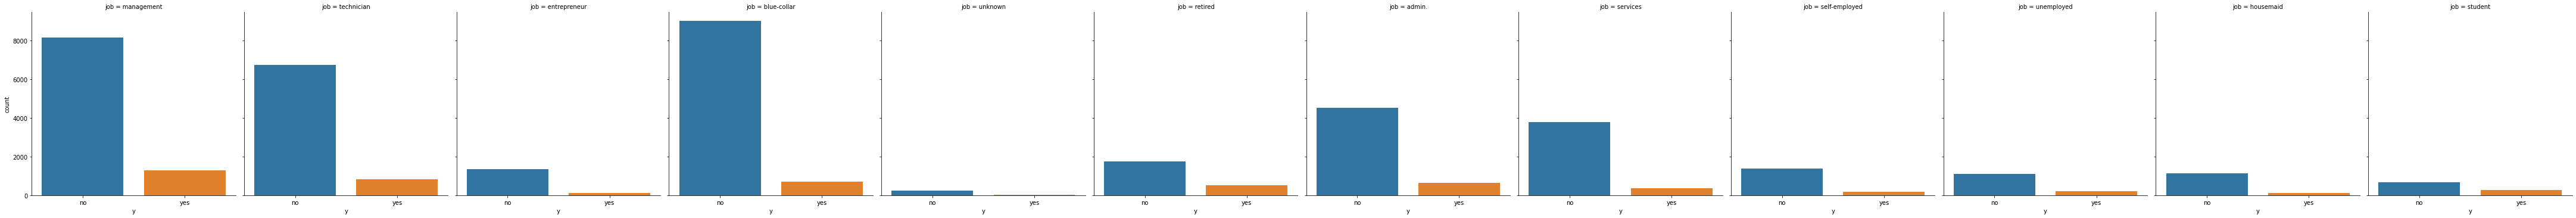

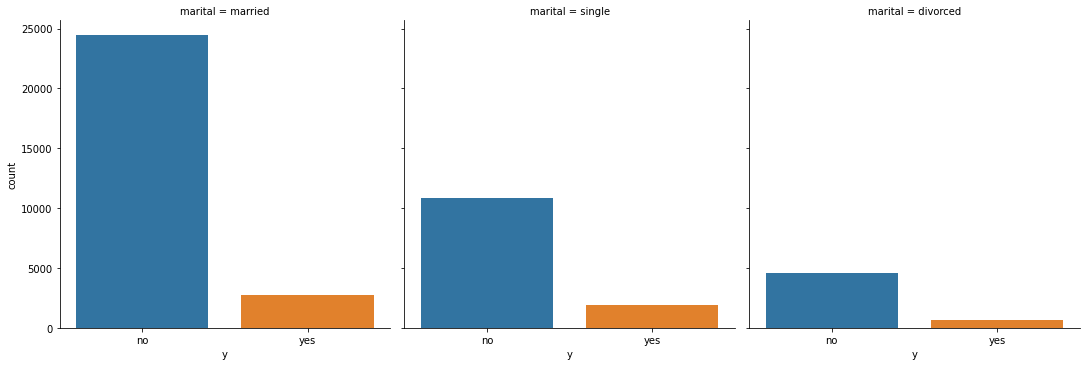

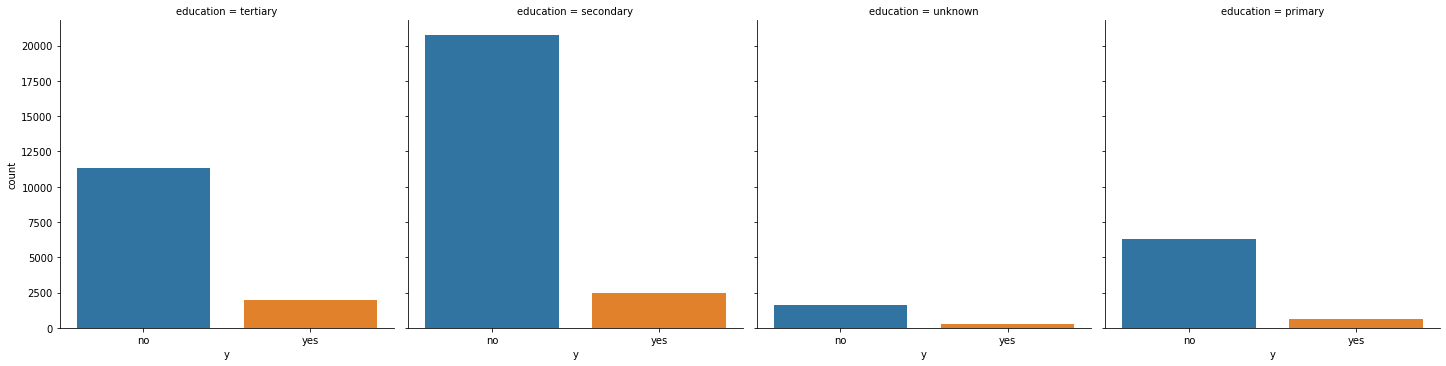

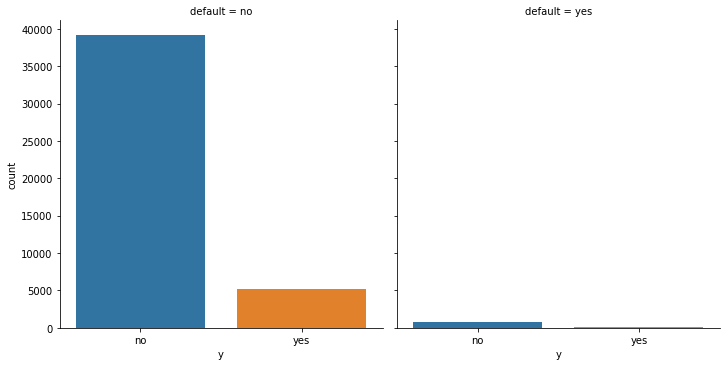

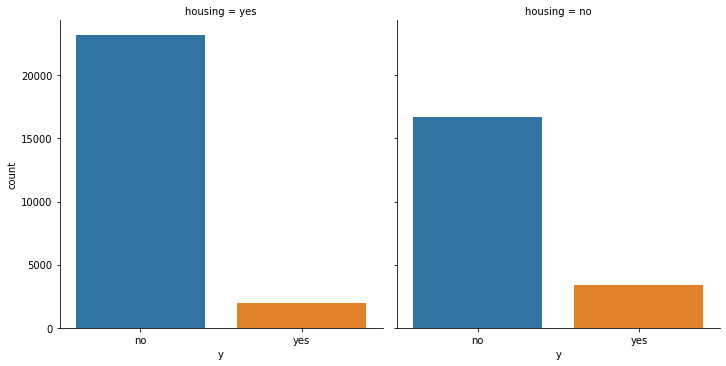

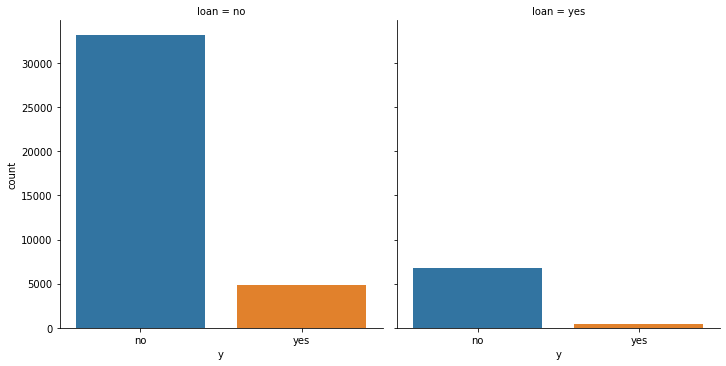

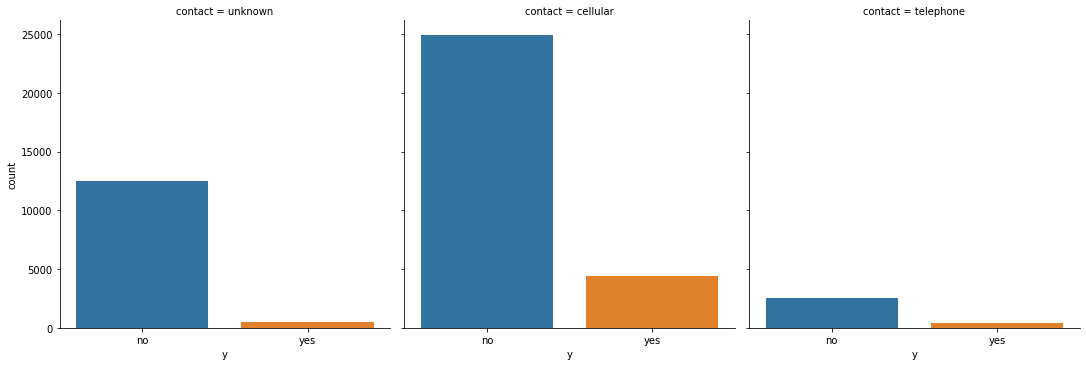

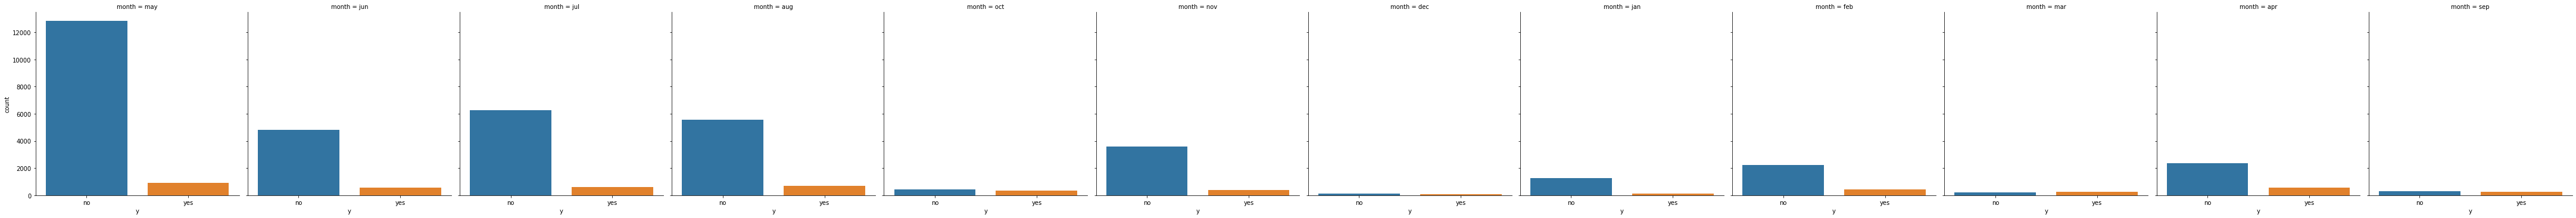

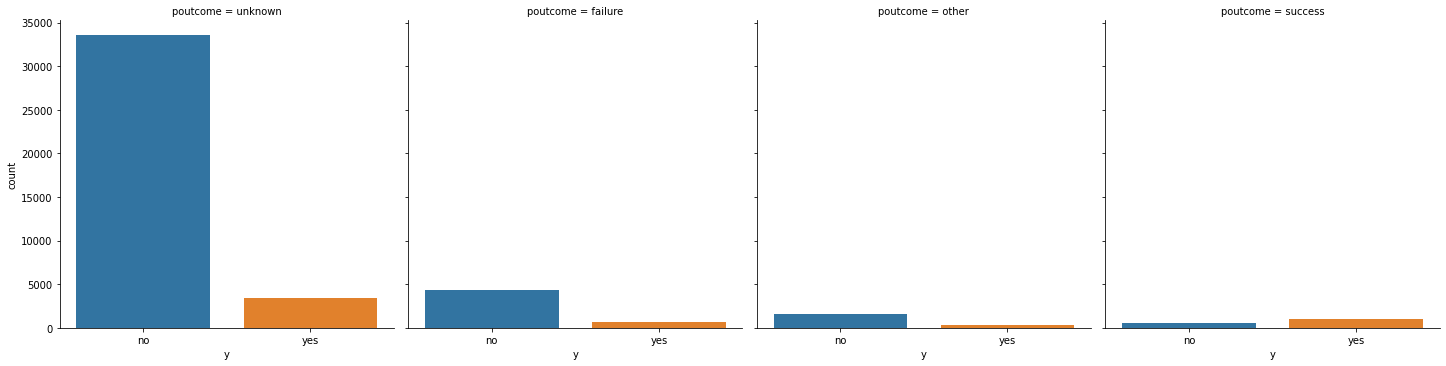

In [24]:
# relation of categorical features with target:
for cat in cat_var:
    sns.catplot(x='y',data=df,col=cat,kind='count')

### Model building and balancing of dataset :

In [25]:
x=df.drop('y',axis=1)
y=df['y']
x.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown


In [26]:
x=pd.get_dummies(x)

In [27]:
# importing SMOTE for balancing of data:
from imblearn.over_sampling import SMOTE

In [28]:
rsm=SMOTE(random_state=0)
x_rsm,y_rsm=rsm.fit_resample(x,y)

In [29]:
# train test splitting:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [30]:
# train test splitting of balanced dataset:

x_rsm_train,x_rsm_test,y_rsm_train,y_rsm_test=train_test_split(x_rsm,y_rsm,test_size=0.3,random_state=42)

In [31]:
# importing necessary metrices:
from sklearn.metrics import confusion_matrix , accuracy_score, classification_report

### 1. Decision Tree

In [32]:
# Model Building:
from sklearn.tree import DecisionTreeClassifier
model_1=DecisionTreeClassifier(max_depth=5,criterion="entropy")

for imbalanced dataset:

In [33]:

model_1.fit(x_train,y_train)
y_pred=model_1.predict(x_test)

In [34]:
print(confusion_matrix(y_test,y_pred))

[[11676   290]
 [ 1095   503]]


In [35]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

          no       0.91      0.98      0.94     11966
         yes       0.63      0.31      0.42      1598

    accuracy                           0.90     13564
   macro avg       0.77      0.65      0.68     13564
weighted avg       0.88      0.90      0.88     13564



### Observation :
1. f1-score for yes is 0.42.
2. accuracy score is 0.90.

for balanced dataset :

In [36]:
model_1.fit(x_rsm_train,y_rsm_train)
y_pred=model_1.predict(x_rsm_test)
print(confusion_matrix(y_rsm_test,y_pred))


[[10216  1757]
 [ 1734 10247]]


In [37]:
print(classification_report(y_rsm_test,y_pred))

              precision    recall  f1-score   support

          no       0.85      0.85      0.85     11973
         yes       0.85      0.86      0.85     11981

    accuracy                           0.85     23954
   macro avg       0.85      0.85      0.85     23954
weighted avg       0.85      0.85      0.85     23954



### Observation :
1. f1-score in yes category is 0.85.
2. accuracy score is 0.85.

### 2. Random Forest :


In [38]:
from sklearn.ensemble import RandomForestClassifier
model_2=RandomForestClassifier(criterion='entropy', max_depth=7, n_estimators=500)

for imbalanced dataset:

In [39]:
model_2.fit(x_train,y_train)
y_pred=model_2.predict(x_test)

In [40]:
print(confusion_matrix(y_test,y_pred))

[[11885    81]
 [ 1336   262]]


In [41]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

          no       0.90      0.99      0.94     11966
         yes       0.76      0.16      0.27      1598

    accuracy                           0.90     13564
   macro avg       0.83      0.58      0.61     13564
weighted avg       0.88      0.90      0.86     13564



### Observation :
1. f1-score in yes category is 0.27
2. accuracy score is 0.90

For balanced dataset :

In [42]:
model_2.fit(x_rsm_train,y_rsm_train)
y_pred=model_2.predict(x_rsm_test)
print(confusion_matrix(y_rsm_test,y_pred))

[[10883  1090]
 [  888 11093]]


In [43]:
print(classification_report(y_rsm_test,y_pred))

              precision    recall  f1-score   support

          no       0.92      0.91      0.92     11973
         yes       0.91      0.93      0.92     11981

    accuracy                           0.92     23954
   macro avg       0.92      0.92      0.92     23954
weighted avg       0.92      0.92      0.92     23954



### Observation :
1. f1-score for yes is 0.92.
2. accuracy score is 0.92.

### 3.SVM :


In [44]:
from sklearn.svm import SVC
model_3=SVC(kernel='rbf')

for imbalanced dataset :

In [45]:
model_3.fit(x_train,y_train)

SVC()

In [46]:
y_pred=model_3.predict(x_test)

In [47]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

          no       0.88      1.00      0.94     11966
         yes       0.50      0.01      0.01      1598

    accuracy                           0.88     13564
   macro avg       0.69      0.50      0.47     13564
weighted avg       0.84      0.88      0.83     13564



### Observation :
1. f1-score for yes is 0.01.
2. accuracy score is 0.88.

for balanced dataset:

In [48]:
model_3.fit(x_rsm_train,y_rsm_train)
y_pred=model_3.predict(x_rsm_test)

In [49]:
print(classification_report(y_rsm_test,y_pred))

              precision    recall  f1-score   support

          no       0.72      0.78      0.75     11973
         yes       0.76      0.70      0.73     11981

    accuracy                           0.74     23954
   macro avg       0.74      0.74      0.74     23954
weighted avg       0.74      0.74      0.74     23954



### Observation :
1. f1-score for yes is 0.73.
2. accuracy is 0.74

### Conclusion:
1. In case of imbalanced dataset, Decision Tree works well with f1-score 0.42 and accuracy score 0.90.
2. In case of balanced dataset, Random Forest performs well with f1-score 0.92 and accuracy score 0.92.